In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [3]:
df['price'].median()

450000.0

In [4]:
df.shape

(19002, 27)

In [5]:
df2 = df.loc[df['price']<1000000]

In [6]:
df2.shape

(17859, 27)

In [7]:
df2['sqft_living'].describe()

count    17859.000000
mean      1951.921384
std        750.703622
min        370.000000
25%       1390.000000
50%       1840.000000
75%       2410.000000
max       6050.000000
Name: sqft_living, dtype: float64

In [8]:
df2.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,-122.319,1690,7639,69,29,True,12.613856,15.150174,12.613856,30.859494
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,-122.233,2720,8062,87,87,False,16.333282,14.375822,14.375822,33.112379
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,-122.393,1360,5000,55,55,True,10.617501,17.522706,10.617501,10.988905
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,-122.045,1800,7503,33,33,False,21.759524,11.683886,11.683886,27.230991
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,-122.327,2238,6819,25,25,False,33.155745,34.734685,33.155745,14.995397
7,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,-122.315,1650,9711,57,57,False,22.111658,23.915175,22.111658,3.914054
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,-122.337,1780,8113,60,60,True,10.637006,14.942803,10.637006,8.088242
9,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,-122.031,2390,7570,17,17,False,35.081072,29.755591,29.755591,22.002334
11,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,4,...,-122.292,1330,6000,78,78,True,9.666948,11.181462,9.666948,27.396803
12,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,4,...,-122.229,1780,12697,93,93,False,18.242762,16.298372,16.298372,35.123797


In [9]:
df1 = df.loc[df['price']>1000000]

In [10]:
df1.shape

(1111, 27)

In [11]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols

(25,
 ['price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'zipcode',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15',
  'Age_of_House',
  'Years_last_renovation',
  'distance_from_seattle',
  'distance_from_bellevue',
  'distance_from_a_city',
  'distance_from_airport'])

In [12]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,-122.319,1690,7639,69,29,True,12.613856,15.150174,12.613856,30.859494
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,-122.233,2720,8062,87,87,False,16.333282,14.375822,14.375822,33.112379
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,-122.393,1360,5000,55,55,True,10.617501,17.522706,10.617501,10.988905
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,-122.045,1800,7503,33,33,False,21.759524,11.683886,11.683886,27.230991
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,-122.005,4760,101930,19,19,True,25.295727,15.508940,15.508940,32.449837


In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
count,1.900200e+04,19002.000000,19002.000000,19002.000000,1.900200e+04,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,...,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000
mean,5.189950e+05,3.356436,2.095569,2048.672140,1.494139e+04,1.490659,0.005420,0.212820,3.408852,7.629250,...,47.559281,-122.213789,1971.727555,12706.170824,48.947637,47.084412,18.653800,17.375233,15.456409,21.623859
std,2.869944e+05,0.878818,0.736520,855.144456,4.038858e+04,0.539483,0.073426,0.726231,0.649056,1.133643,...,0.139216,0.141105,665.973671,26911.473643,29.299880,28.899801,10.742445,9.082501,9.871559,9.639932
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,47.155900,-122.519000,399.000000,651.000000,5.000000,5.000000,1.235977,0.303167,0.303167,0.973432
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.029000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.468800,-122.329000,1484.000000,5100.000000,23.000000,22.000000,9.843296,11.490417,8.082215,13.355579
50%,4.500000e+05,3.000000,2.250000,1900.000000,7.579000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,47.570700,-122.231000,1830.000000,7600.000000,45.000000,43.000000,16.715730,15.250864,12.911980,21.752038
75%,6.350000e+05,4.000000,2.500000,2520.000000,1.056975e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,47.678400,-122.124000,2340.000000,10035.000000,68.000000,66.000000,25.594849,21.458959,20.127112,28.764596
max,2.000000e+06,7.000000,5.000000,7620.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,47.777600,-121.315000,5790.000000,871200.000000,120.000000,120.000000,77.240209,67.260521,67.260521,79.793415


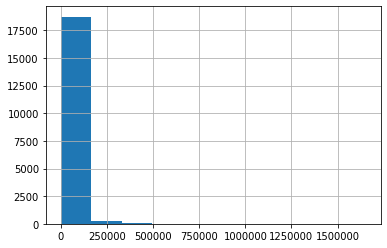

In [14]:
df['sqft_lot'].hist()

In [15]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Age_of_House', 'Years_last_renovation',
       'basement', 'distance_from_seattle', 'distance_from_bellevue',
       'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [16]:
corr = df.drop('price',axis=1).corr()

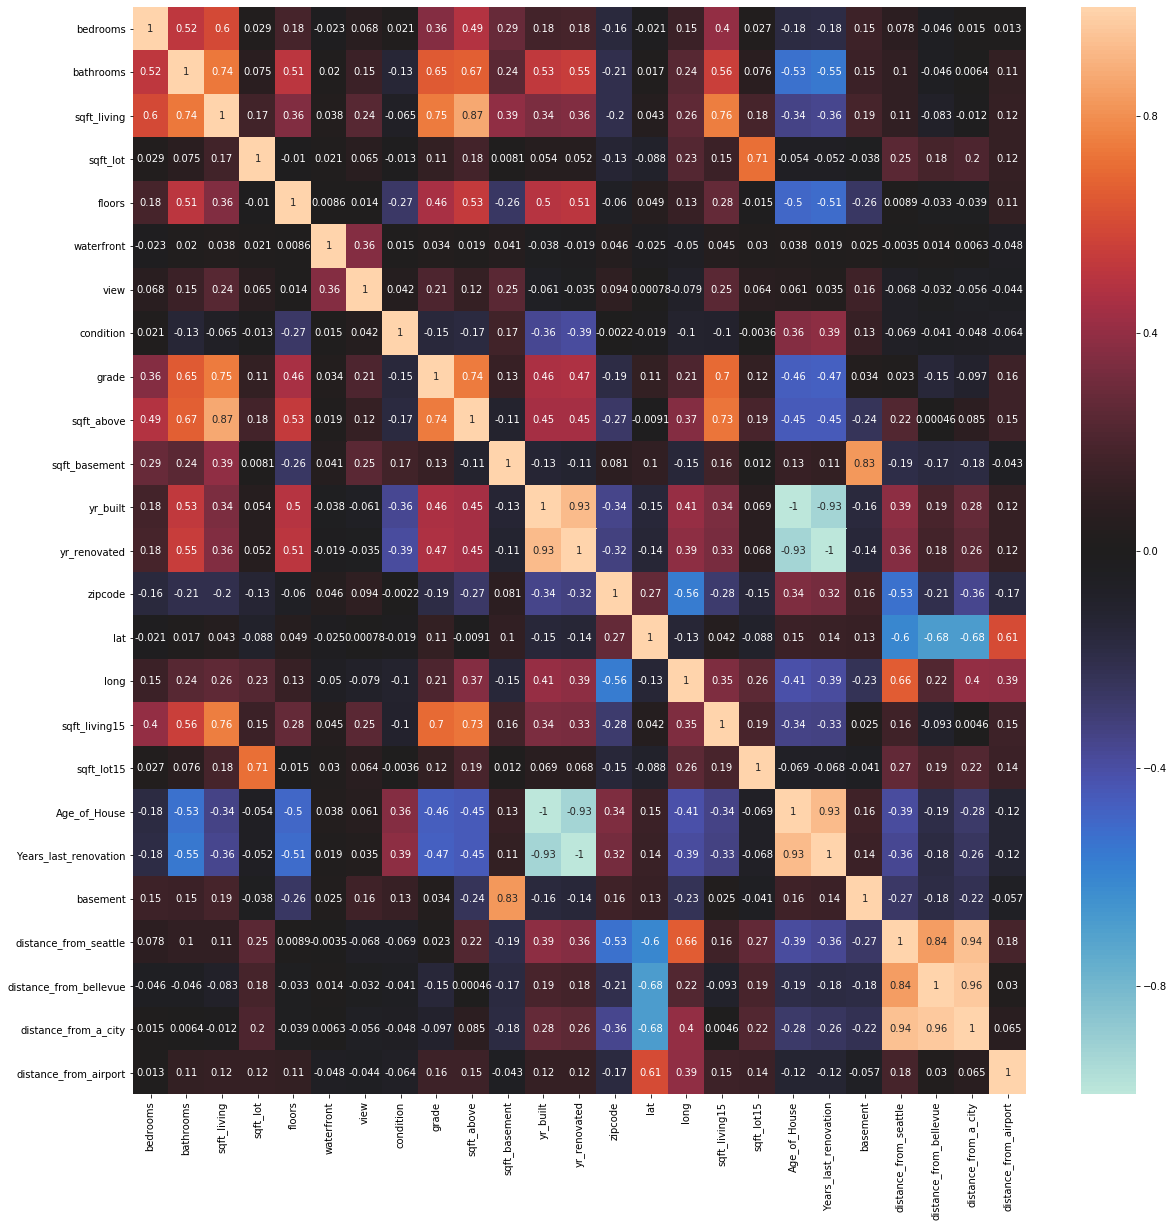

In [17]:
# Your code here
plt.figure(figsize=(20,20))
sns.heatmap(corr, center=0, annot=True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [18]:
# Deleting Columns I think will be an issue

In [20]:
#df.drop(['yr_built','yr_renovated','id','sqft_above','sqft_basement','lat','long','distance_from_seattle','distance_from_bellevue','sqft_living15','sqft_lot15'],axis=1,inplace = True)
df.drop(['yr_built','yr_renovated', 'sqft_above','sqft_basement','lat','long','distance_from_seattle','distance_from_bellevue','sqft_living15','sqft_lot15'],axis=1,inplace = True)


In [23]:
corr1 = df.drop('price',axis=1).corr()

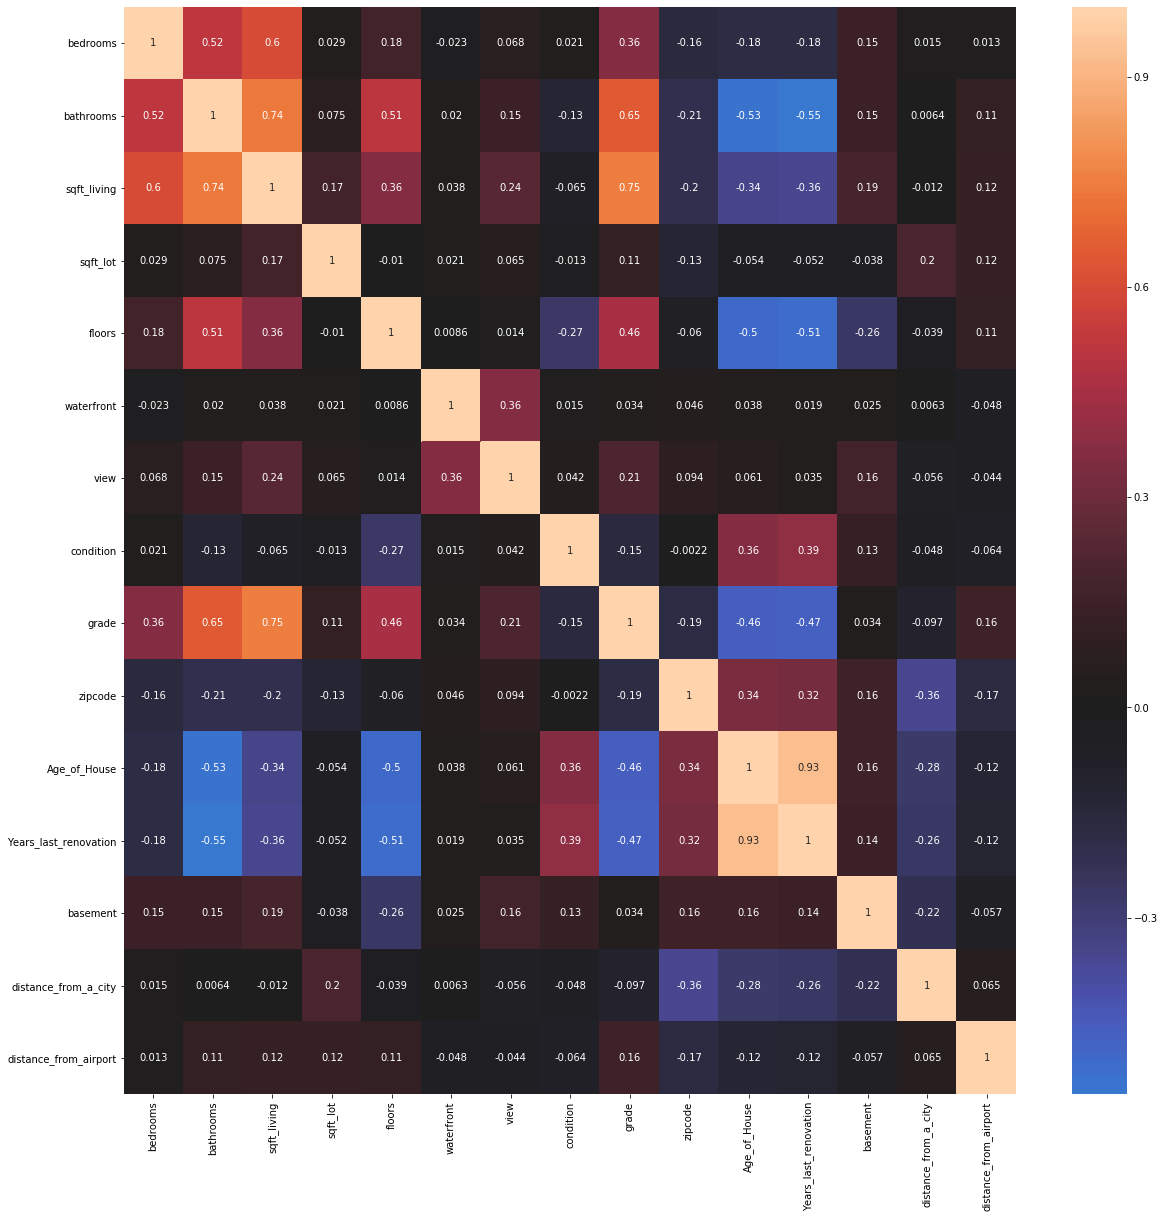

In [24]:
# Your code here
plt.figure(figsize=(20,20))
sns.heatmap(corr1, center=0, annot=True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [25]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols

(15,
 ['price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'zipcode',
  'Age_of_House',
  'Years_last_renovation',
  'distance_from_a_city',
  'distance_from_airport'])

In [26]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement',
       'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [27]:
numericals = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','Age_of_House', 'Years_last_renovation','distance_from_a_city', 'distance_from_airport']

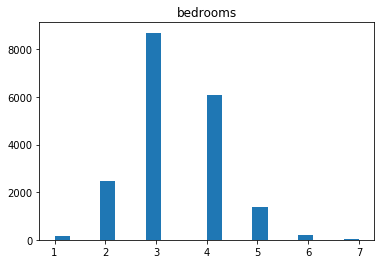

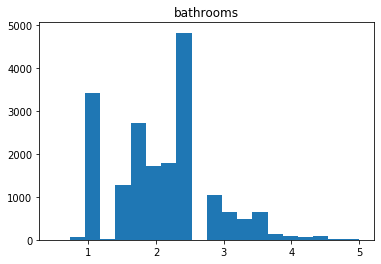

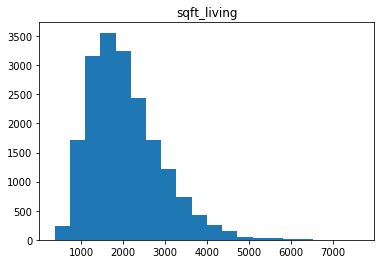

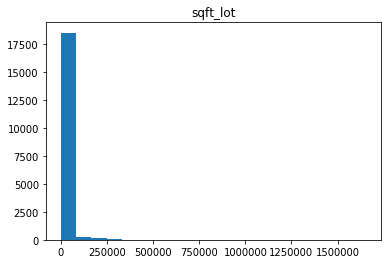

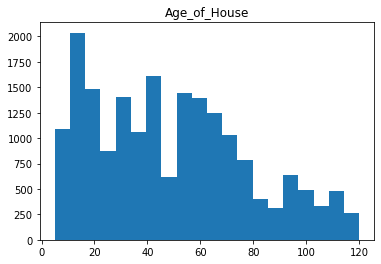

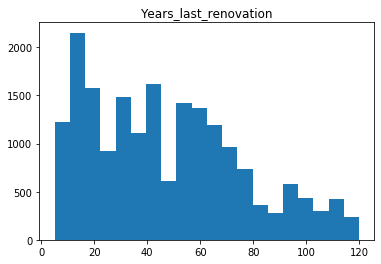

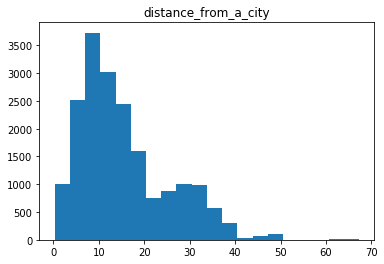

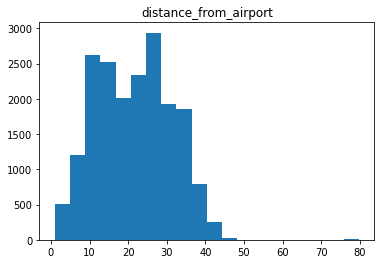

In [28]:
for col in numericals:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()

In [29]:
numericals

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_a_city',
 'distance_from_airport']

In [30]:
df.to_csv('data_correlation_gone.csv')

In [31]:
numericals = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','Age_of_House', 'Years_last_renovation','distance_from_a_city', 'distance_from_airport']

In [32]:
def norm_feat(series):
    return (series - series.mean())/series.std()


In [33]:
for feat in numericals:
    df[feat] = norm_feat((df[feat]))


In [34]:
df.reset_index(drop=True,inplace=True)

In [35]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.405586,0.209677,0.609637,-0.190633,2.0,0.0,0.0,3,7,98125,0.684384,-0.625763,True,-0.287954,0.958060
1,2015-02-25,180000.0,-1.543479,-1.487493,-1.495270,-0.122346,1.0,0.0,0.0,3,6,98028,1.298721,1.381172,False,-0.109465,1.191764
2,2014-12-09,604000.0,0.732307,1.227979,-0.103693,-0.246143,1.0,0.0,0.0,5,7,98136,0.206566,0.273898,True,-0.490187,-1.103219
3,2015-02-18,510000.0,-0.405586,-0.129757,-0.431123,-0.169884,1.0,0.0,0.0,3,8,98074,-0.544290,-0.487353,False,-0.382161,0.581657
4,2014-05-12,1230000.0,0.732307,3.264583,3.942407,2.153792,1.0,0.0,0.0,3,11,98053,-1.022108,-0.971786,True,0.005322,1.123035


In [36]:
df.to_csv('data_correlation_gone_norm.csv')